# Project 6a - PDEs: the heat equation

### Intro
Many physical systems are governed by the notion that quantities should move from areas where there is alot of stuff to areas where there is less stuff.  Examples of course include populations - in competition for resources, people or animals move in the direction where there are fewer people or animals - or heat - temperatures tend to even out over time.  How can we encode this notion in the form of an equation?  In broad strokes, this model follows a similar pattern as in everything we've done previously.  

Let's first define our quanitity of interest to be $u(\mathbf{x},t)$.  Note that, as implied above, $u$ will vary in space and time.  Now, let's consider how $u$ should change.  It will be helpful to think about this process in a discrete way, which is what we've done already for spatially-dependent SIR.  What I mean by this is that we can view $u(x,t)$ as living on a regular grid, and we'll be interested in coupling its values by considering the movement of the quantity into and out of adjacent grid cells.  

To begin, let's consider just a 1D grid (i.e. subdivisions of a line).  We can then write a very general equation for this type of thinking at a single grid cell as 
$$
\frac{\partial}{\partial t} \int_{x_l}^{x_{r}} u \; \mathrm{d} x = F|_{x_{r}} - F|_{x_l},
$$
where $x_l$ and $x_r$ are the left and right edges of the cell, and $F$ is a *flux*, which is to say the rate at which stuff moves through the boundary.  This looks a little fancy, but is actually really easy to interpret.  It just says that the change in the total amount of stuff in a cell is given by how much stuff goes out the left and right boundaries.  Quite simple!  Stopping here actually yields a useful formulation that we can use to solve the equation, but for the purposes of understanding, it is helpful to do a few more manipulations.  We see that the left hand side involves an integral (this basically says that the total amount of stuff in a cell is given by the amount of stuff pointwise summed over all locations in the cell), but the left side doesn't.  However, we can notice that
$$
F|_{x_{r}} - F|_{x_l} = \int_{x_l}^{x_r} \frac{\partial F}{\partial x} \; \mathrm{d} x.
$$
If we substitute this into the previous equation we get 
$$
\frac{\partial}{\partial t} \int_{x_l}^{x_{r}} u \; \mathrm{d} x = \int_{x_l}^{x_r} \frac{\partial F}{\partial x} \; \mathrm{d} x.
$$
Also, we can notice that $x_l$ and $x_r$ don't change in time, so we can move the derivative on the left side inside the integral without changing the equation.  This gives us
$$
\int_{x_l}^{x_{r}} \frac{\partial u}{\partial t} \; \mathrm{d} x = \int_{x_l}^{x_r} \frac{\partial F}{\partial x} \; \mathrm{d} x.
$$
Now consider the case where we make the cell that we're considering infinitesimally small.  In this limit, the integrals drop out, and we're left with an equation of the integrands.
$$
\frac{\partial u}{\partial t} = \frac{\partial F}{\partial x}. 
$$
This type of equation is called a *conservation law* and it is ubiquitous across science.  It is also the prototype for a *partial differential equation*, so-called because it involves partial derivatives in more than one dimension (here those dimensions are time and space).

Note that this isn't a complete specification of the problem because we don't yet know what $F$ should be.  However, we still haven't used our intuition to encode the notion that stuff should move from areas of high density to areas of low density.  How can we write a flux that respects that idea?  One way (and the most common way) is to write
$$
F = -k \frac{\partial u}{\partial x}.
$$
The partial derivative is the spatial gradient of the solution.  This quantity will be positive when the solution is increasing from left to right.  This will imply a flux from left to right as well, which is the opposite of what we want: such a situation would tend to increase rather than decrease the amount of stuff in the highest density cell.  Thus we add the negative sign which tells us that stuff should move in a direction opposite the gradient (or downhill, if you'd like to think of it that way).  Note also the presence of a constant $k$, which is just a scaling factor. 

If we substitute this flux into the conservation law, we get
$$
\frac{\partial u}{\partial t} = -k \frac{\partial^2 u}{\partial x^2}.
$$
This equation is called the *diffusion equation* (or sometimes the *heat equation* since it was originally developed in the context of predicting the transport of heat in a metal rod), and we'll begin our practical study of PDEs by trying to solve it.


### The finite difference in space
How can we go about doing this?  Of course we already know how to deal with the left hand side (the time derivative), and we can continue to utilize these same tools.  However, we'll need to do something slightly different for the right hand side, because it involves derivatives of the solution in space.  However, we can use similar techniques - we will just be performing derivative approximations in space rather than time. 

Recall that we are operating on a grid.  Let's say that the distance between grid centers is $\Delta x$.  Then we can approximate derivatives using the Taylor series.  For a first derivative, we could, for example, write
$$
u(x+\Delta x) \approx u(x) + \frac{\partial u}{\partial x} \Delta x \implies \frac{\partial u}{\partial x} \approx \frac{u(x+\Delta x) - u(x)}{\Delta x}.
$$
This is just like the forward Euler method.  It's also not very accurate.  We can make it more accurate by noting that another Taylor series that involves the derivative is 
$$
u(x-\Delta x) \approx u(x) - \frac{\partial u}{\partial x} \Delta x. 
$$
If we add the two together and rearrange, we get
$$
\frac{\partial u}{\partial x} \approx \frac{u(x + \Delta x) - u(x-\Delta x)}{2\Delta x}.
$$
This is called a centered difference, and it's quite a bit more accurate than either of the uncentered versions.  However, for the heat equation, we need *second* derivatives.  This turns out to be okay, we just need to expand the Taylor series in higher order terms.  If we do this in both directions and then add them together, we get the centered finite difference approximation
$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x-\Delta x) - 2u(x) + u(x+\Delta x)}{\Delta x^2}.
$$
Because our grid is evenly spaced, we could also write this as 
$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i-1} - 2u_i + u_{i+1}}{\Delta x^2} \rightarrow \begin{bmatrix} 1 & -2 & 1 \end{bmatrix} \cdot \begin{bmatrix} u_{i-1} & u_i & u_{i+1} \end{bmatrix}
$$
Interestingly, we can view this through the same lens as we did the spatial SIR model.  The difference is that rather than using a convolution kernel that does averaging, now we're using a kernel that does (second) differentiation.  As an example, let's use this to take the derivative of the sine function.  We know that the second derivative of 
$$
u(x) = \sin(2 \pi x) \implies \frac{\partial^2 u}{\partial x^2} = -(2\pi)^2 u(x) 
$$
Let's see this in action

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = np.random.rand(3)
f = f.reshape(-1,1)
print(f.shape)

(3, 1)


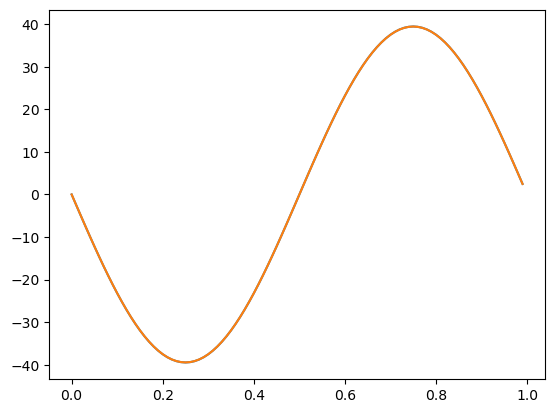

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,101)
x = x[:-1]
dx = x[1]-x[0]
u = np.sin(2*np.pi*x).reshape(-1,1)

kernel = np.array([1.,-2,1.]).reshape(-1,1)/dx**2

from scipy.signal import convolve2d
d2udx2 = convolve2d(u,kernel,mode='same',boundary='wrap')

plt.plot(x,-(2*np.pi)**2*u)
plt.plot(x,d2udx2)

We get a very good result (in fact, you could easily verify that the error here is $\mathcal{O}(\Delta x^3)$).  We could try this method on other functions as well:

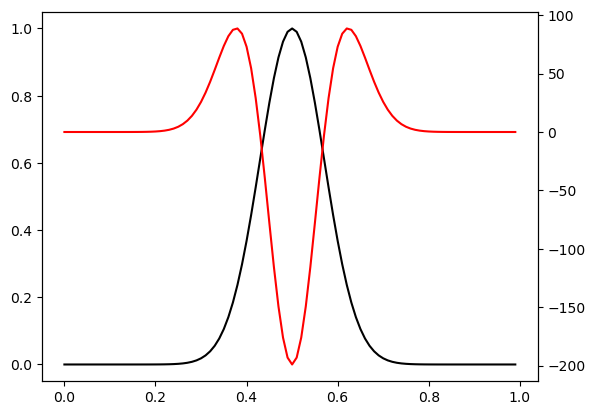

In [4]:
import numpy as np
from scipy.ndimage import convolve1d
import matplotlib.pyplot as plt

x = np.linspace(0,1,101)
x = x[:-1]
dx = x[1]-x[0]
u = np.exp(-(x-0.5)**2/(0.1**2))

kernel = np.array([1.,-2,1.])/dx**2

fig,ax = plt.subplots()
d2udx2 = convolve1d(u,kernel,mode='wrap')
ax.plot(x,u,'k-')
ax2 = ax.twinx()
ax2.plot(x,d2udx2,'r-')

### Explicit solution of the diffusion equation
We now know how to deal with the spatial derivative term, and we already know how to deal with a time derivative, so we can immediately solve the equation.  Let's set up a problem class with a right hand side function as before.

In [5]:
import numpy as np
import ode_methods as om
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d

class Diffusion:
    
    def __init__(self,dx,k=0.01):
        
        self.k = k    # diffusion coefficient 
        self.d2_kernel = np.array([1,-2,1])/dx**2
        
    def rhs(self,t,u):

        d2udx2 = convolve1d(u,self.d2_kernel,mode='wrap')    
        dudt = self.k*d2udx2
              
        return dudt

Pretty straightforward.  Now we need to specify initial conditions.  Let's use the centered gaussian bump that we defined previously.

In [6]:
x = np.linspace(0,1,101)
x = x[:-1]
dx = x[1]-x[0]

u0 = np.exp(-(x-0.5)**2/(0.1**2))

Now, our method of solving this is just like before: instantiate the problem class, define a time-integration method, and run the integrator class.  Note that we can use any time-stepping method that we like here, but simple forward Euler will be adequate for our purposes.  

In [7]:
method = om.Midpoint()
diffusion = Diffusion(dx,k=0.01)
integrator = om.Integrator(diffusion,method)
t,u = integrator.integrate([0,5],0.005,u0)

Now we can plot the solution.  Animations are possible, but I like to plot curves colored by time.

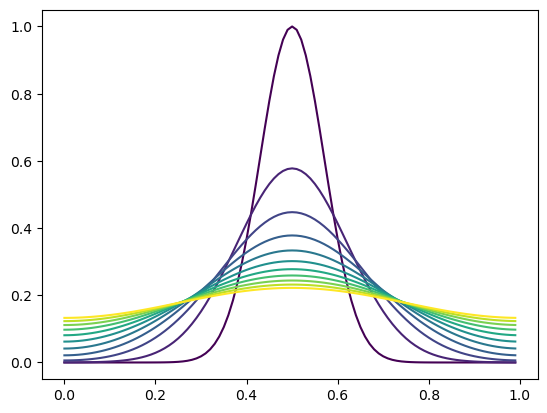

In [8]:
cmap = plt.cm.viridis

for tt,uu in zip(t[::100],u[::100]):
    plt.plot(x,uu,color=cmap(tt/t[-1]))

As expected, we see the curve flattening out.

Note that if I repeat the above experiment with a slightly larger time step:

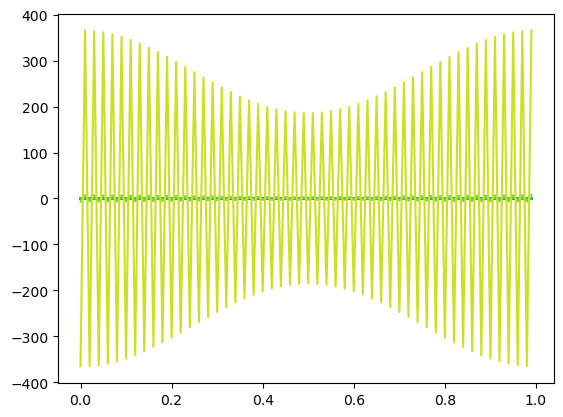

In [9]:
t,u = integrator.integrate([0,5],0.0051,u0)
cmap = plt.cm.viridis

for tt,uu in zip(t[::100],u[::100]):
    plt.plot(x,uu,color=cmap(tt/t[-1]))

I get a pretty unsatisfactory result.  You might think that one way to get around this would be to use a better time-stepping method than Euler, but alas that doesn't help: the issue here is deeper than that.  It turns out that to maintain stability, we cannot allow material to "move" further than a single grid cell in a given time step.  This makes a little bit of sense because our second derivative kernel is local: it only looks one cell to the left and right.  For diffusive problems like this one, we can derive a maximum time step based on this condition (often called the Courant-Friedrich-Lewy condition), which is:
$$
\Delta t \le \frac{\Delta x^2}{2 k}.
$$
Let's compute the maximum time step for the problem above

In [10]:
dt_max = dx**2/(2*0.01)
print(dt_max)

0.005


We will soon see an alternative method of dealing with time stepping that will allow us to circumvent this requirement, but for now, this is something that we will have to live with. 


### Boundary conditions
The equations above have been solved using periodic boundary conditions, something that we are pretty familiar with from our previous endeavors.  However, in the real world it's pretty rare to want to solve PDEs on the ring or torus or whatever.  Consider the transfer of heat in a metal bar: there are well-defined end points where the physics of the system changes, and there we need to do something special.

#### Dirichlet boundaries
There are two types of boundary conditions that are commonly encountered, and they have fancy names but are fairly simple.  The first one is called a Dirichlet boundary condition and it implies that we are simply specifying the value of the solution at the boundary.  For example, let's say we wish to solve the diffusion equation over a unit length metal bar with the left end clamped so as to have temperature 1 and the right end clamped so as to have temperature 0.  We could write this mathematically as 
$$
\frac{\partial u}{\partial t} = -k \frac{\partial^2 u}{\partial x^2}.
$$
$$
u(x,t=0) = 0
$$
$$
u(0,t) = 1, \quad u(1,t)=0 
$$
where the first line is the PDE, the second line is the initial condition, and the last line are the *boundary conditions* described in words above.  

Implementing such boundary conditions is very easy: we can just ensure that the solution is always set to the relevant value.  There are multiple ways to do this, but my preference is to set the boundary values in the initial condition and then explicitly set the time-derivative for those locations to zero.  No time derivative, no change in the solution value.  **Using this method or a method of your choosing, implement the Dirichlet boundary conditions described above and integrate forward in time using the stated initial conditions.  Before doing this, perhaps it would be useful to think about what you expect the solution to look like (particularly as the system nears a steady state).** 

In [21]:
class Diffusion:
    
    def __init__(self,dx,k=0.01):
        
        self.k = k    # diffusion coefficient 
        
        self.d2_kernel = np.array([1,-2,1])/dx**2
        
    def rhs(self,t,u):

        d2udx2 = convolve1d(u,self.d2_kernel)    
        dudt = self.k*d2udx2
              
        return dudt

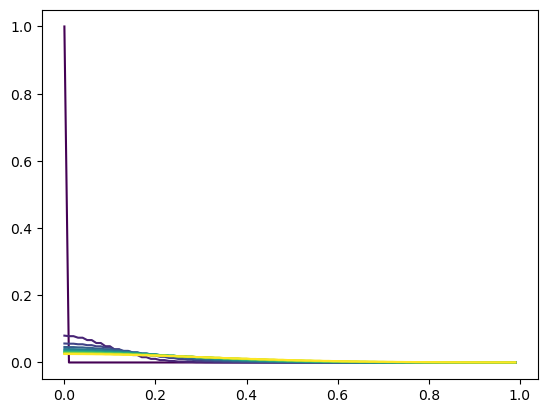

In [19]:
u_0 = np.zeros(100)

u_0[0] = 1

method = om.Midpoint()
diffusion = Diffusion(dx,k=0.01)
integrator = om.Integrator(diffusion,method)
t,u = integrator.integrate([0,5],0.005,u_0)

cmap = plt.cm.viridis

for tt,uu in zip(t[::100],u[::100]):
    plt.plot(x,uu,color=cmap(tt/t[-1]))

#### Neumann boundaries
The other type of boundary condition is a Neumann boundary, and rather than specify the solution value at a boundary, we specify the flux.  For example, if we proceed as above, but instead of clamping the right boundary to have temperature zero, we assume it is a perfect insulator, then we have
$$
\frac{\partial u}{\partial t} = -k \frac{\partial^2 u}{\partial x^2}.
$$
$$
u(x,t=0) = 0
$$
$$
u(0,t) = 1, \quad k\frac{\partial u}{\partial x}(x=1,t) = 0. 
$$
This takes a bit more thinking to implement.  We can begin by using a centered finite difference approximation of the boundary condition
$$
k\frac{\partial u}{\partial x}(x=1,t) \approx k \frac{u_{n+1} - u_{n-1}}{\Delta x} = 0. 
$$
where $n$ is the index of the boundary point.  We obviously don't (and can't) know the solution outside the boundary $u_{n+1}$.  However, we can solve for it in terms of other values, i.e.
$$
u_{n+1} = u_{n-1}.
$$
If we plug this formula back into the discretized approximation to the heat equation, we get
$$
\frac{\partial u}{\partial t}(t,x=1) = k \frac{\partial^2 u}{\partial x^2}(t,x=1) \approx k \frac{2u_{n-1} - 2u_n }{\Delta x^2}.
$$
Thus if we use this formula to compute the time derivative for just the special right point, then we will have fulfilled this boundary condition.  
**Implement the Dirchlet/Neumann boundary conditions described above and integrate forward in time using the stated initial conditions.  Before doing this, perhaps it would be useful to think about what you expect the solution to look like (particularly as the system nears a steady state).** 

In [35]:
class Diffusion:
    
    def __init__(self,dx,k=0.01):
        
        self.k = k   # diffusion coefficient 
        
        self.d2_kernel = np.array([1,-2,1])/dx**2

        self.d2_kernel_end = np.array([0, -2,2])/dx**2
        
    def rhs(self,t,u):

        d2udx2 = convolve1d(u,self.d2_kernel)    
        dudt = self.k*d2udx2

        d2udx2 = convolve1d(u, self.d2_kernel_end)

        dudt[-1] = self.k*d2udx2[-1]

        dudt[0] = 1
              
        return dudt

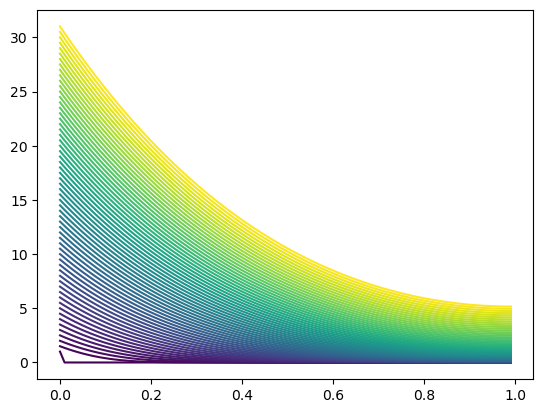

In [40]:
u_0 = np.zeros(100)
u_0[0] = 1


u_0 = np.zeros(100)

u_0[0] = 1

method = om.Midpoint()
diffusion = Diffusion(dx,k=0.01)
integrator = om.Integrator(diffusion,method)
t,u = integrator.integrate([0,30],0.005,u_0)

cmap = plt.cm.viridis

for tt,uu in zip(t[::100],u[::100]):
    plt.plot(x,uu,color=cmap(tt/t[-1]))
